In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from gbm_stock_prices import GBMPrices
from ATRB import ATRB

In [2]:
gbm = GBMPrices()

In [3]:
# Parameters
ticker = 'SPY'
history_end_date = '2024-04-19'
history_start_date = (pd.to_datetime(history_end_date) - np.timedelta64(365, 'D')).strftime('%Y-%m-%d')

print(f"History period used to estimate mu and sigma: from {history_start_date} to {history_end_date}")

data = gbm.download_history(ticker, history_start_date, history_end_date)
data.tail()

History period used to estimate mu and sigma: from 2023-04-20 to 2024-04-19
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-12,514.369995,515.820007,509.079987,510.850006,510.850006,92469100
2024-04-15,515.130005,515.299988,503.579987,504.450012,504.450012,92101400
2024-04-16,504.940002,506.500000,502.209991,503.529999,503.529999,73484000
2024-04-17,506.049988,506.220001,499.119995,500.549988,500.549988,75910300
2024-04-18,501.980011,504.130005,498.559998,499.519989,499.519989,74548100


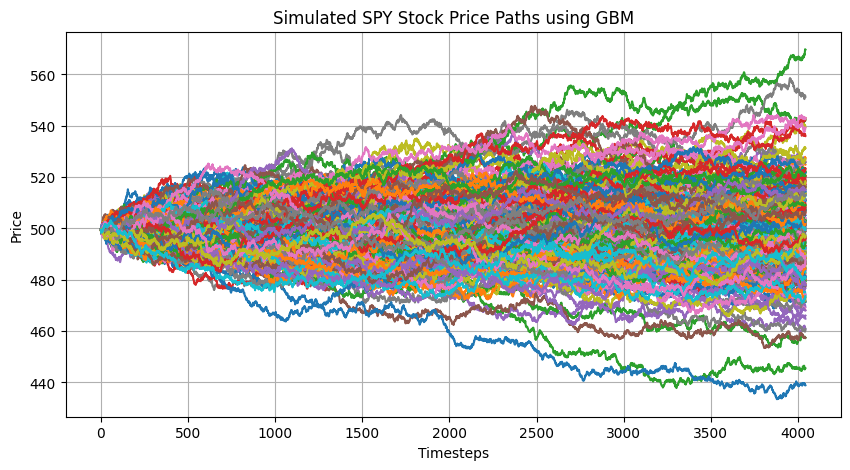

In [4]:
simulations = 200
target_end_date = '2025-06-30'
gbm_simulated = gbm.simulate_multiple_path(history_end_date, target_end_date, simulations)

# Plotting the simulated paths
plt.figure(figsize=(10, 5))
for i in range(simulations):
    plt.plot(list(range(gbm_simulated.shape[1])), gbm_simulated[i])
plt.title('Simulated SPY Stock Price Paths using GBM')
plt.xlabel('Timesteps')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [5]:
simu_data = gbm.simu_high_low_close(history_end_date, target_end_date)
simu_data.head()

,Date,High,Low,Close
0,2024-04-19,502.048458,499.942227,502.048458
1,2024-04-22,502.040558,500.643748,501.515728
2,2024-04-23,501.618288,500.383534,501.326746
3,2024-04-24,502.717537,500.961287,502.520575
4,2024-04-25,503.678091,502.446284,503.678091


In [6]:
atrb = ATRB()

# Parameters
atr_window = 10
window_multiplier = 4.5

In [7]:
simu_start_date, simu_end_date = '2024-01-01', target_end_date
real_data = data[data.index >= (pd.to_datetime(simu_start_date) - np.timedelta64(atr_window+1, 'D')).strftime('%Y-%m-%d')]

In [8]:
data_compile = pd.concat([simu_data, real_data.reset_index()[simu_data.columns]]).sort_values(by=['Date']).set_index('Date')
atr_df = atrb.process(data_compile, atr_window, window_multiplier, simu_start_date)
atr_df.tail()

,Date,ATR,Lower_Bound,Close
74,2025-05-30,1.412702,482.798278,489.155439
75,2025-06-06,1.291073,482.306240,488.116070
76,2025-06-13,1.428798,481.309985,487.739574
77,2025-06-20,1.308200,479.837526,485.724427
78,2025-06-27,1.360681,476.192854,482.315919


In [9]:
# atr_df.to_csv("atr_data_gbm.csv", index=False)